In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

<h1>PREPARING DATA</h1>

<h4>0. Input Data</h4>

In [2]:
df = pd.read_excel('input\Training Data.xlsx')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MQ2              900 non-null    float64
 1   MQ3              900 non-null    float64
 2   MQ4              900 non-null    float64
 3   MQ5              900 non-null    float64
 4   MQ6              900 non-null    float64
 5   MQ7              900 non-null    float64
 6   MQ8              900 non-null    float64
 7   MQ9              900 non-null    float64
 8   MQ135            900 non-null    float64
 9   SPAD_class       900 non-null    object 
 10  Nitrogen_class   900 non-null    object 
 11  Flavonoid_class  900 non-null    object 
 12  Treatmen         900 non-null    object 
dtypes: float64(9), object(4)
memory usage: 91.5+ KB


,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.012111,-0.001767,-0.026956,-0.002878,-0.000678,-0.002233,-0.002100,-0.002489,-0.001456
std,0.024662,0.009391,0.057775,0.009964,0.005155,0.004574,0.006581,0.009220,0.004763
min,-0.130000,-0.030000,-0.190000,-0.040000,-0.020000,-0.020000,-0.030000,-0.030000,-0.020000
25%,-0.030000,0.000000,-0.060000,-0.010000,0.000000,0.000000,-0.010000,0.000000,0.000000
50%,-0.010000,0.000000,-0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.050000,0.040000,0.140000,0.020000,0.030000,0.010000,0.010000,0.020000,0.020000


In [3]:
df.drop(['Nitrogen_class', 'Flavonoid_class', 'Treatmen'], axis=1, inplace=True)

In [4]:
df.head()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,SPAD_class
0,-0.05,0.01,-0.10,-0.02,0.0,-0.01,-0.01,-0.03,-0.01,00SPAD
1,-0.04,0.00,-0.12,-0.01,0.0,-0.01,0.00,-0.03,-0.01,00SPAD
2,-0.03,0.00,-0.06,-0.02,0.0,-0.01,0.00,-0.03,0.00,00SPAD
3,-0.04,0.00,-0.09,-0.02,0.0,-0.01,0.00,-0.03,-0.01,00SPAD
4,-0.05,0.00,-0.09,-0.02,0.0,-0.01,0.00,-0.03,-0.01,00SPAD


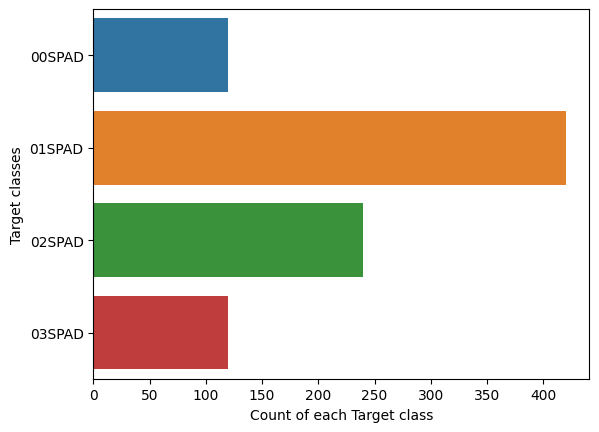

In [5]:
sns.countplot(y=df.SPAD_class, data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

<h4>1. Membagi Data untuk Training dan Testing</h4>

In [6]:
X = df.drop(['SPAD_class'], axis=1)
y = df.SPAD_class

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

675
675
225
225


<h4>2. Standarisasi Data</h4>
<p>Feature Skaling bertujuan agar satu variable independen tidak mendominasi variable yang lain sehingga perhitungan yang dilakuan menjadi lebih mudah.</p>

In [8]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#print(X_train)
#print(X_test)

<h1>METODE 1: KNN</h1>

In [9]:
from sklearn.neighbors import KNeighborsClassifier

<h4>1. Menentukan Nilai k</h4>


The optimal number of neighbors is 5.


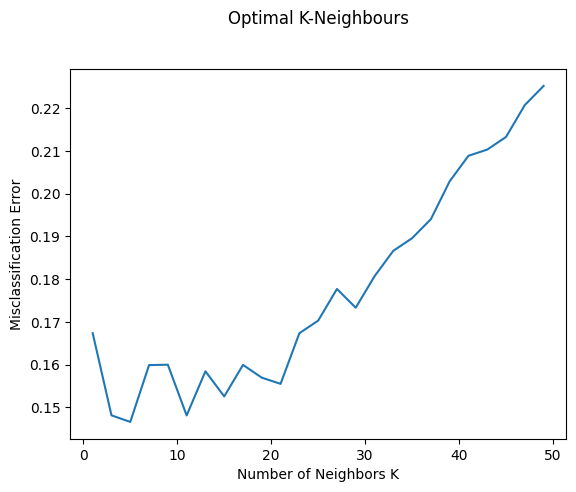

In [10]:
myList = list(range(0, 50))
neighbors = list(filter(lambda x : x % 2 != 0, myList))
neighbors
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy' )
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(neighbors, MSE)
plt.title('Optimal K-Neighbours', y=1.1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<h4>2. Tune KNN</h4>

In [11]:
clf = KNeighborsClassifier(metric= 'euclidean', n_neighbors= optimal_k)
clf.fit(X_train, y_train)

y_pred_knn = clf.predict(X_test)
pd.crosstab(y_test, y_pred_knn)

col_0,00SPAD,01SPAD,02SPAD,03SPAD
SPAD_class,,,,
00SPAD,27,4,0,0
01SPAD,0,101,2,3
02SPAD,0,1,57,0
03SPAD,0,15,0,15


<h4>3. Menghitung Akurasi</h4>

In [12]:
print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
print('Recall:{}'.format(recall_score(y_test, y_pred_knn, average='macro')))
print('Precision:{}'.format(precision_score(y_test, y_pred_knn, average='macro')))
print('F1-Score:{}'.format(f1_score(y_test, y_pred_knn, average='macro')))

              precision    recall  f1-score   support

      00SPAD       1.00      0.87      0.93        31
      01SPAD       0.83      0.95      0.89       106
      02SPAD       0.97      0.98      0.97        58
      03SPAD       0.83      0.50      0.62        30

    accuracy                           0.89       225
   macro avg       0.91      0.83      0.86       225
weighted avg       0.89      0.89      0.88       225

[[ 27   4   0   0]
 [  0 101   2   3]
 [  0   1  57   0]
 [  0  15   0  15]]
Recall:0.8266391378260961
Precision:0.9085364430125602
F1-Score:0.8550653246318217


Accuracy with K-NN: 88.89%


Text(0.5, 23.52222222222222, 'Predicted label')

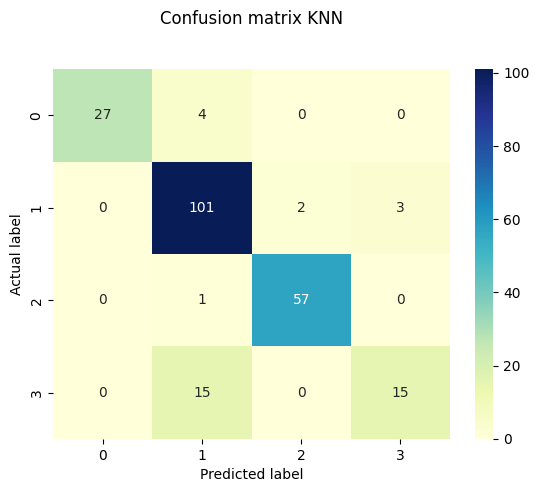

In [13]:
cm = confusion_matrix(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)*100
print("Accuracy with K-NN: {0:.2f}%".format(accuracy))

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h1>METODE 2 : SVM</h1>

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from transformers import pipeline

<h4>1. Menentukan Parameter Terbaik</h4>

In [15]:
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=8)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    }

gridSearch = GridSearchCV(SVC(), param_grid, cv=cv,
                          scoring=['recall','f1'],refit='f1',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV] END .........................gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........................gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............................gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........................gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ..........................gamma=auto, kernel=linear; total time=   0.0s
[CV] END ............................gamma=auto, kernel=poly; total time=   0.0s
[CV] END .............................gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........................gamma=auto, kernel=sigmoid; total time=   0.0s
Score:  nan
Parameters:  {'gamma': 'scale', 'kernel': 'linear'}


<h4>2. Tune SVM</h4>

In [16]:
svm = make_pipeline(StandardScaler(), SVC(gamma='scale', kernel='linear'))
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
pd.crosstab(y_test, y_pred_svm)

col_0,00SPAD,01SPAD,02SPAD,03SPAD
SPAD_class,,,,
00SPAD,28,2,1,0
01SPAD,0,94,11,1
02SPAD,3,7,47,1
03SPAD,0,14,0,16


<h4>3. Menghitung Akurasi</h4>

In [17]:
print(classification_report(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
print('Recall:{}'.format(recall_score(y_test, y_pred_svm, average='macro')))
print('Precision:{}'.format(precision_score(y_test, y_pred_svm, average='macro')))
print('F1-Score:{}'.format(f1_score(y_test, y_pred_svm, average='macro')))

              precision    recall  f1-score   support

      00SPAD       0.90      0.90      0.90        31
      01SPAD       0.80      0.89      0.84       106
      02SPAD       0.80      0.81      0.80        58
      03SPAD       0.89      0.53      0.67        30

    accuracy                           0.82       225
   macro avg       0.85      0.78      0.80       225
weighted avg       0.83      0.82      0.82       225

[[28  2  1  0]
 [ 0 94 11  1]
 [ 3  7 47  1]
 [ 0 14  0 16]]
Recall:0.7834241050503354
Precision:0.8480359170627076
F1-Score:0.8040901509728358


Accuracy with SVM: 82.22%


Text(0.5, 23.52222222222222, 'Predicted label')

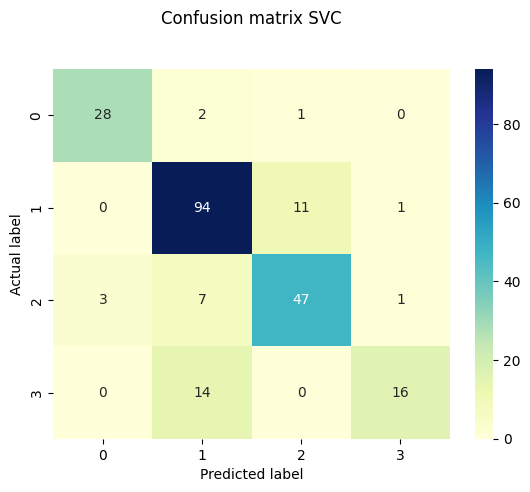

In [18]:
cm = confusion_matrix(y_test, y_pred_svm)
accuracy = accuracy_score(y_test, y_pred_svm)*100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix SVC', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h1>METODE 3: Decission Trees (dt)</h1>

In [19]:
from sklearn.tree import DecisionTreeClassifier

<h4>1. Menentukan Parameter Terbaik</h4>

In [20]:
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=8)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    }

gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=cv,
                          scoring=['recall','f1'],refit='f1',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV] END .....................................criterion=gini; total time=   0.0s
[CV] END ..................................criterion=entropy; total time=   0.0s
[CV] END .................................criterion=log_loss; total time=   0.0s
Score:  nan
Parameters:  {'criterion': 'gini'}


<h4>2. Tune DT</h4>

In [21]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
pd.crosstab(y_test, y_pred_dt)

col_0,00SPAD,01SPAD,02SPAD,03SPAD
SPAD_class,,,,
00SPAD,27,2,2,0
01SPAD,1,103,2,0
02SPAD,1,1,55,1
03SPAD,0,13,0,17


<h4>>>>> Visualisasi</h4>

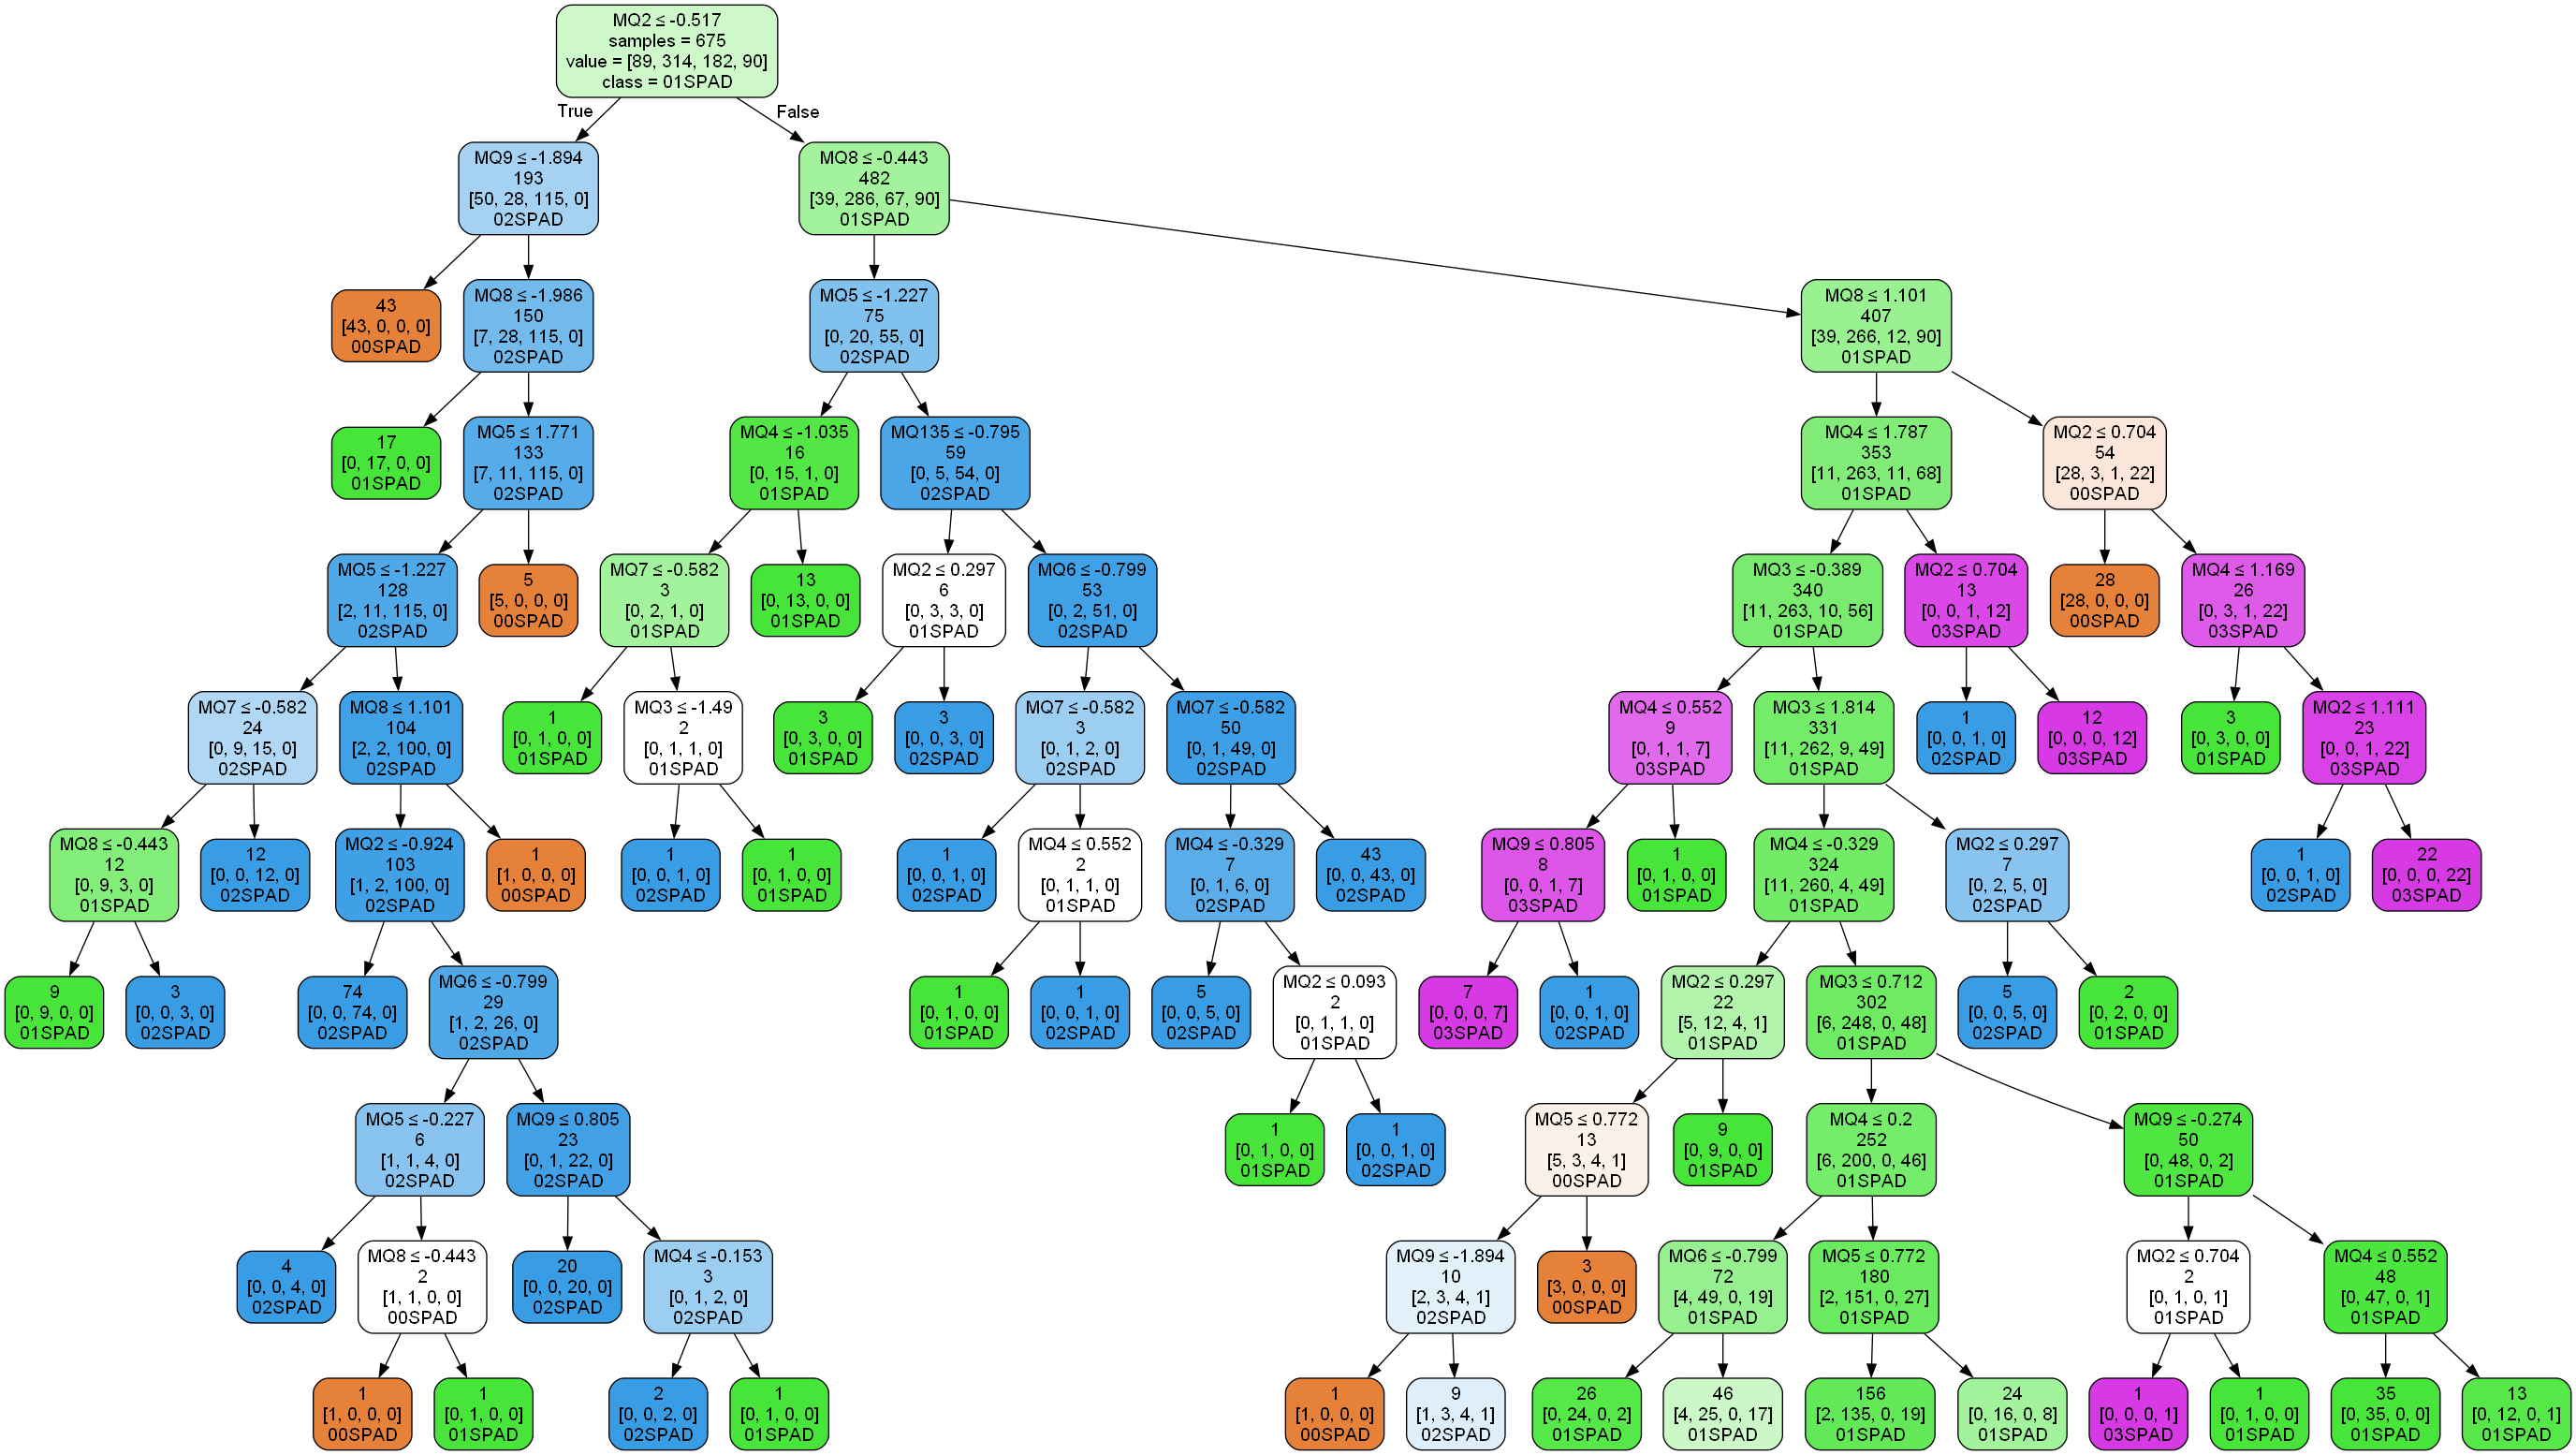

In [22]:
from dmba import plotDecisionTree
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

plotDecisionTree(dt, feature_names=X_train.columns, class_names=dt.classes_)

<h4>3. Menghitung Akurasi</h4>

In [23]:
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
print('Recall:{}'.format(recall_score(y_test, y_pred_dt, average='macro')))
print('Precision:{}'.format(precision_score(y_test, y_pred_dt, average='macro')))
print('F1-Score:{}'.format(f1_score(y_test, y_pred_dt, average='macro')))

              precision    recall  f1-score   support

      00SPAD       0.93      0.87      0.90        31
      01SPAD       0.87      0.97      0.92       106
      02SPAD       0.93      0.95      0.94        58
      03SPAD       0.94      0.57      0.71        30

    accuracy                           0.90       225
   macro avg       0.92      0.84      0.87       225
weighted avg       0.90      0.90      0.89       225

[[ 27   2   2   0]
 [  1 103   2   0]
 [  1   1  55   1]
 [  0  13   0  17]]
Recall:0.8394020959696658
Precision:0.9183071338802422
F1-Score:0.8660149572649573


Accuracy with SVM: 89.78%


Text(0.5, -1.777777777777784, 'Predicted label')

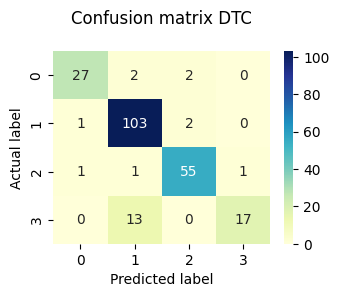

In [24]:
cm = confusion_matrix(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, y_pred_dt)*100
print("Accuracy with SVM: {0:.2f}%".format(accuracy))

plt.figure(figsize=(3.5,2.5))
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix DTC', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h4>1. Preprocessing</h4>

<h1>METODE 4: Multilayer Perceptron (mlp)</h1>

In [25]:
from sklearn.neural_network import MLPClassifier

<h4>1. Menentukan parameter terbaik</h4>

In [26]:
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=8)

param_grid = {
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam']
    }

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring=['recall','f1'],refit='f1',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 12 candidates, totalling 12 fits
[CV] END ..................activation=identity, solver=lbfgs; total time=   0.0s
[CV] END ....................activation=identity, solver=sgd; total time=   0.4s
[CV] END ...................activation=identity, solver=adam; total time=   0.3s
[CV] END ..................activation=logistic, solver=lbfgs; total time=   1.0s
[CV] END ....................activation=logistic, solver=sgd; total time=   1.1s
[CV] END ...................activation=logistic, solver=adam; total time=   0.9s
[CV] END ......................activation=tanh, solver=lbfgs; total time=   0.5s
[CV] END ........................activation=tanh, solver=sgd; total time=   0.4s
[CV] END .......................activation=tanh, solver=adam; total time=   0.3s
[CV] END ......................activation=relu, solver=lbfgs; total time=   0.4s
[CV] END ........................activation=relu, solver=sgd; total time=   0.2s
[CV] END .......................activation=relu,

<h4>2. Tune MLP</h4>

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=10,activation='identity', solver='lbfgs', max_iter=1000,
                            random_state=8)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
pd.crosstab(y_test, y_pred_mlp)

col_0,00SPAD,01SPAD,02SPAD,03SPAD
SPAD_class,,,,
00SPAD,28,0,3,0
01SPAD,2,92,10,2
02SPAD,4,14,40,0
03SPAD,0,15,3,12


In [28]:
print(classification_report(y_test, y_pred_mlp))
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)
print('Recall:{}'.format(recall_score(y_test, y_pred_mlp, average='macro')))
print('Precision:{}'.format(precision_score(y_test, y_pred_mlp, average='macro')))
print('F1-Score:{}'.format(f1_score(y_test, y_pred_mlp, average='macro')))

              precision    recall  f1-score   support

      00SPAD       0.82      0.90      0.86        31
      01SPAD       0.76      0.87      0.81       106
      02SPAD       0.71      0.69      0.70        58
      03SPAD       0.86      0.40      0.55        30

    accuracy                           0.76       225
   macro avg       0.79      0.72      0.73       225
weighted avg       0.77      0.76      0.75       225

[[28  0  3  0]
 [ 2 92 10  2]
 [ 4 14 40  0]
 [ 0 15  3 12]]
Recall:0.7152013767918232
Precision:0.7888221404264185
F1-Score:0.7298300200456472


Accuracy with MLP: 76.44%


Text(0.5, 23.52222222222222, 'Predicted label')

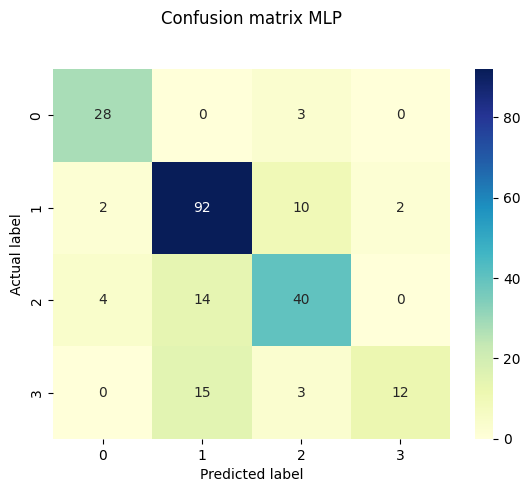

In [29]:
cm = confusion_matrix(y_test, y_pred_mlp)
accuracy = accuracy_score(y_test, y_pred_mlp)*100
print("Accuracy with MLP: {0:.2f}%".format(accuracy))

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h1>COMPARING METHODE</h1>